# Activation Functions
 - used to introduce non-linearity in the networks.

We apply the activation function to the input, which is multiplied by weights and added to the bias, that is, <br>
$f(z)$, where $z$ = _(input * weights) + bias_ and $f(.)$ is the activation function. <br>

If activation function is not applied, then the neuron resembles the linear regression.

Some of the most commonly used activation functions are:
*** 

## The Sigmoid Function
It scales the value between 0 and 1. <br>
Mathematically, $$ f(x) = \frac{1}{1 + e^{-x}}$$

It is an S-shaped curve which is centered on 0.5.

It is also known as a __logistic__ function. As we know that probability lies between 0 and 1 and since the sigmoid function squashes the value between 0 and 1, it is used to predict the probability of the output.

In [152]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

## The Tanh function
A __hyperbolic tangent (tanh)__ function outputs the value between -1 to +1.

Mathematically, $$ f(x) = \frac{1 - e^{-2x}}{1 + e^{-2x}}$$

It also resembles the S-shaped curve. Unlike sigmoid function which is centered on 0.5, the tanh function is 0 centered.

In [153]:
def tanh(x):
    numerator = 1 - np.exp(-2*x)
    denominator = 1 + np.exp(-2*x)
    return numerator/denominator

## ReLU (Rectified Linear Unit) Function

The ReLU function, short for Rectified Linear Unit, is a commonly used activation function in neural networks. It is defined as:

$$f(x) = max(0, x)$$

where:
- $f(x)$ is the output of the ReLU function for input \( x \).
- $x$ is the input value.

In other words, the ReLU function returns the input value \( x \) if it is greater than or equal to zero, and returns zero otherwise.

In [154]:
def ReLU(x):
    if x<0:
        return 0
    return x

## The Leaky ReLU function
The Leaky ReLU (Rectified Linear Unit) is a variant of the ReLU activation function that addresses the "dying ReLU" problem by allowing a small gradient when the unit is not active. It is defined as:

$$f(x) = \begin{cases}
x, & \text{if } x \geq 0 \\
\alpha x, & \text{otherwise}
\end{cases}$$

where:
- $f(x)$ is the output of the Leaky ReLU function for input \( x \).
- $x$ is the input value.
- $\alpha$ is a small positive constant (typically a small fraction like 0.01) that determines the slope of the function for \( x < 0 \).

Instead of setting some default values of $\alpha$, we can send them as a parameter to a neural network and make the network learn the optimal value of $\alpha$. Such activation function can be termed as a __Parametric ReLU function__.

The Leaky ReLU function retains the positive values of the input as it is, but for negative values, it introduces a slight slope to avoid completely "killing" the gradient during training (dying ReLU problem).

Graphically, the Leaky ReLU function is similar to the ReLU function, but it has a small slope for negative values, allowing some gradient flow for those inputs.

In [155]:
def leakyReLU(x, alpha=0.01):
    if x < 0:
        return alpha*x
    return x

## The Exponential linear unit function
__Exponential Linear unit (ELU)__,like Leaky ReLU, has a small slope for negative values. But instead of having a straight line, it has a log curve.<br>
$$f(x) = \begin{cases}
x, & \text{if } x \geq 0 \\
\alpha \cdot (e^x - 1), & \text{otherwise}
\end{cases} $$

where:
- \( f(x) \) is the output of the ELU function for input \( x \).
- \( x \) is the input value.
- $\alpha$ is a positive constant that determines the slope of the function for \( x < 0 \). Typically, $\alpha$ is set to a small positive value, such as 0.01.

The ELU function keeps positive values unchanged, similar to the ReLU function. For negative values, it has a smooth curve with an exponential growth, ensuring a non-zero gradient even for negative inputs.

Graphically, the ELU function behaves similarly to the ReLU function for positive values and introduces a smooth curve for negative values, preventing the "dying ReLU" issue while maintaining the benefits of activation functions like ReLU.

In [156]:
def ELU(x,alpha=0.01):
    if x < 0:
        return (alpha * (np.exp(x) - 1))
    return x

## The Swish function
The __Swish__ function is a recently introduced activation function by Google. Unlike other activation functions, which are monotonic, Swish is a non-monotonic function, which means it is neither always non-increasing or non-decreasing.<br>
It provides better performance than ReLU.

$$ f(x) = x \cdot \sigma(x) $$

It can be reparametrized as:
$$ f(x) = 2x \cdot \sigma(\beta x) $$

where:
- \( f(x) \) is the output of the Swish function for input \( x \).
- \( x \) is the input value.
- $\sigma(\cdot)$ is the sigmoid function, which is defined as $ \sigma(x) = \frac{1}{1 + e^{-x}} $.
- $ \beta $ is a hyperparameter that determines the slope of the function.

When $\beta = 0 $, the Swish function simplifies to $ f(x) = x $, and as $ \beta $ increases, the function becomes $2 max(0,x) $, which is basically the ReLU function multiplied by some constant value. So, the value of $ \beta $ acts as a good interpolation between a linear and a non-linear function.

In [157]:
def swish(x,beta):
    return 2*x*sigmoid(beta*x)

## The Softmax function
The __softmax function__ is the generalization of the sigmoid function. It is usually applied to the final layer of the network. It converts a vector of raw scores into a probability distribution over multiple classes.

Given a vector $ \mathbf{z} = (z_1, z_2, \ldots, z_n) $ of raw scores, the softmax function computes the probability $ p_i $ of class $ i $ as:

$$ p_i = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}} $$

where:
- $ p_i $ is the probability of class $ i $.
- $ z_i $ is the raw score for class $ i $.
- The denominator represents the sum of exponentiated raw scores over all classes, ensuring that the probabilities sum to 1.

The softmax function's output interprets the raw scores as probabilities, indicating the likelihood of each class. The class with the highest probability is often selected as the predicted class.

The softmax function is used in the final layer of a neural network during multiclass classification, where it transforms the raw scores into a probability distribution that can be used to make predictions.

It's important to note that the softmax function can sometimes exaggerate differences between scores, leading to potential issues with vanishing gradients or making the model sensitive to small input variations.

In [158]:
def softmax(x):
    return np.exp(x) / np.exp(x).sum(axis=0)

# Forward Propagation in ANN

In a two-layer neural network with an input layer and a single neuron in the output layer, the forward propagation process can be described mathematically as follows:

1. **Input Layer**: We have two inputs, $x_1$ and $x_2$. Since we have two inputs, the number of neurons in the input layer will be two.

2. **Hidden Layer (Single Neuron)**:
   We set the number of neurons in the hidden layer to four. Now the inputs will be multiplied by their weights, and then we add bias and  propagate the result value to the hidden layer where the activation function will be applied.<br>

   Before that, we need to initialize the weight matrix. Since we do not know which input is more important than other, we randomly initialize the weights and bias value. The weight and bias value between the input to the hidden layer are represented by $W_{xh} and b_{h} $ respectively. The dimension of the weight matrix must be the **_number of neurons in the current layer x number of neurons in the next layer_** (basic matrix multiplication rule).<br>
   
   So, $$ z_1 = XW_{xh} + b_h $$ <br>

   Now, this is passed to the hidden layer. In hidden layer, we apply an activation function to $z_1$ (sigmoid activation function).
   $$ a_1 = \sigma(z_1) $$

   We again multiply result $a_1$ by a new weight matrix and add a new bias value that is flowing between the hidden layer and the output layer. We denote this weight matrix and bias as $W_{hy} and b_{y}$, respectively. The dimension of the weight matrix, $W_{hy}$, will be the *__number of neurons in the hidden layer x number of neurons in the output layer__*. So, we multiply $a_1$ by the weight matrix and add bias $b_y$ and pass the result to the output layer.
   $$ z_2 = a_1W_{hy} + b_y $$
   
   - Weighted Sum Calculation:
     $ z = \sum_{i=1}^{n} (w_i \cdot x_i) + b $
     - $ w_i $ are the weights associated with each input $ x_i $.
     - $ b $ is the bias term.
   - Applying Activation Function:
     $ a = f(z) $
     - $ f(\cdot) $ represents the chosen activation function.


4. **Output Layer (Single Neuron)**:
   Now in the output layer, we apply sigmoid function to $z_2$ which will result an output value $y$ <br>
   $$ y = \sigma(z_2) $$

   This whole process from the input layer to the output layer is known as __forward propagation__.
   - Weighted Sum Calculation:
     $ z_{\text{output}} = w_{\text{output}} \cdot a + b_{\text{output}} $
     - $ w_{\text{output}} $ is the weight associated with the hidden layer's output $ a $.
     - $ b_{\text{output}} $ is the bias term.
   - Applying Activation Function (e.g., softmax for classification):
     $ \text{output} = \text{activation\_function}(z_{\text{output}}) $


In [159]:
def forward_prop(X,Wxh,Why):
    z1 = np.dot(X,Wxh) + bh
    a1 = sigmoid(z1)
    z2 = np.dot(a1,Why) + by
    y_hat = sigmoid(z2)
    return z1,a1,z2,y_hat

# How does ANN learn?
In forward propagation, the network is just trying to predict the output. We define a __cost function(J)__ or __a loss function (L)__ which tells us how well our neural network is predicting. If the cost or loss is very high, the network is not predicting correct output. So, our objective is to minimize the cost function so that our neural network predictions will be better. We cannot change the input values, we are only left with weights and bias values. At first, we initialized these values randomly which means they are not perfect. Now, we update these weight matrices in such a way that our neural network gives a correct output. To update these weight matrices, we use a technique called __gradient descent__. <br>

This whole process of backpropagating the network from the output layer tothe input layer and updating the weights of the network using gradient descent to minimize the loss is called __backpropagation__. <br>

We are using mean squared error as a __cost function (J)__. Mathematically, 
$$J = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$


In [160]:
def backward_prop(y_hat, z1, a1, z2):
    delta2 = np.multiply(-(y-y_hat),sigmoid_derivative(z2))
    dJ_dWhy = np.dot(a1.T, delta2)
    delta1 = np.dot(delta2,Why.T)*sigmoid_derivative(z1)
    dJ_dWxh = np.dot(x.T, delta1)
    return dJ_dWxh, dJ_dWhy

# Building a neural network from scratch
We build the network that learns to perform the XOR gate operation. The XOR gate returns 1 only when exactly only one of its inputs is 1, else it returns 0.
To perform the XOR gate operation, we build a simple two-layer neural network that has input layer with two nodes: a hidden layer with 5 nodes and an output layer with 1 node.

In [161]:
import matplotlib.pyplot as plt

### Preparing the data (XOR table)

In [162]:
x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

### Defining the number of nodes in each layer

In [163]:
num_input = 2
num_hidden = 5
num_output = 1

### Initializing the weights and biases randomly

In [164]:
#Input layer to hidden layer weights
Wxh = np.random.randn(num_input,num_hidden)
bh = np.zeros((1,num_hidden))

#Hidden layer to output layer
Why = np.random.randn(num_hidden,num_output)
by = np.zeros((1,num_output))

### Define the derivative of sigmoid function

In [165]:
def sigmoid_derivative(z):
    return np.exp(-z)/((1+np.exp(-z))**2)

### Define the cost function

In [166]:
def cost_function(y,y_hat):
    J = 0.5*sum((y-y_hat)**2)
    return J

### Set the learning rate and the number of training iterations

In [167]:
alpha = 0.01
num_iterations = 5000

### Start Training

In [168]:
cost = []
for i in range(num_iterations):
    z1,a1,z2,y_hat = forward_prop(x,Wxh,Why)
    dJ_dWxh, dJ_dWhy = backward_prop(y_hat, z1, a1, z2)
    
    #update weights
    Wxh = Wxh - alpha * dJ_dWxh
    Why = Why - alpha * dJ_dWhy
    
    #compute cost
    c = cost_function(y,y_hat)
    
    cost.append(c)

### Plot the cost function

Text(0, 0.5, 'Cost')

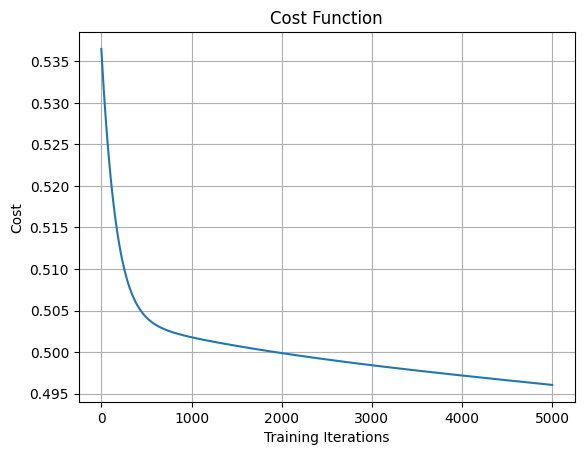

In [169]:
plt.grid()
plt.plot(range(num_iterations),cost)
plt.title('Cost Function')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')